In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", style="darkgrid")
import sys
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
train=pd.read_csv("G:/compete/ai/city_rent_precent/data_set/train_data.csv")
test=pd.read_csv("G:/compete/ai/city_rent_precent/data_set/test_a.csv")
print(train.shape)
print(test.shape)

(41440, 51)
(2469, 50)


In [3]:
target='tradeMoney'
test[target]=-1
data=pd.concat([train,test])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43909 entries, 0 to 2468
Data columns (total 51 columns):
ID                    43909 non-null int64
area                  43909 non-null float64
rentType              43909 non-null object
houseType             43909 non-null object
houseFloor            43909 non-null object
totalFloor            43909 non-null int64
houseToward           43909 non-null object
houseDecoration       43909 non-null object
communityName         43909 non-null object
city                  43909 non-null object
region                43909 non-null object
plate                 43909 non-null object
buildYear             43909 non-null object
saleSecHouseNum       43909 non-null int64
subwayStationNum      43909 non-null int64
busStationNum         43909 non-null int64
interSchoolNum        43909 non-null int64
schoolNum             43909 non-null int64
privateSchoolNum      43909 non-null int64
hospitalNum           43909 non-null int64
drugStoreNum        

In [4]:
columns=data.columns.tolist()
columns


['ID',
 'area',
 'rentType',
 'houseType',
 'houseFloor',
 'totalFloor',
 'houseToward',
 'houseDecoration',
 'communityName',
 'city',
 'region',
 'plate',
 'buildYear',
 'saleSecHouseNum',
 'subwayStationNum',
 'busStationNum',
 'interSchoolNum',
 'schoolNum',
 'privateSchoolNum',
 'hospitalNum',
 'drugStoreNum',
 'gymNum',
 'bankNum',
 'shopNum',
 'parkNum',
 'mallNum',
 'superMarketNum',
 'totalTradeMoney',
 'totalTradeArea',
 'tradeMeanPrice',
 'tradeSecNum',
 'totalNewTradeMoney',
 'totalNewTradeArea',
 'tradeNewMeanPrice',
 'tradeNewNum',
 'remainNewNum',
 'supplyNewNum',
 'supplyLandNum',
 'supplyLandArea',
 'tradeLandNum',
 'tradeLandArea',
 'landTotalPrice',
 'landMeanPrice',
 'totalWorkers',
 'newWorkers',
 'residentPopulation',
 'pv',
 'uv',
 'lookNum',
 'tradeTime',
 'tradeMoney']

In [5]:
#直接区分数值型和别的类型
numeric_dtypes=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
all_feature=data.columns
#去掉两个不同无关列
drop_feature=['ID','tradeMoney']
num_feature=[]
object_feature=[]
for i in data.columns:
    if i not in drop_feature:
        if data[i].dtype in numeric_dtypes:
            num_feature.append(i)
        else:
            object_feature.append(i)
print("num_feature number of %s"%len(num_feature))
print("object_feature number of %s" % len(object_feature))

num_feature number of 38
object_feature number of 11


In [6]:
data[object_feature].head()

,rentType,houseType,houseFloor,houseToward,houseDecoration,communityName,city,region,plate,buildYear,tradeTime
0,未知方式,2室1厅1卫,低,暂无数据,其他,XQ00051,SH,RG00001,BK00064,1953,2018/11/28
1,未知方式,3室2厅2卫,中,暂无数据,简装,XQ00130,SH,RG00002,BK00049,2007,2018/12/16
2,未知方式,3室2厅2卫,低,暂无数据,其他,XQ00179,SH,RG00002,BK00050,暂无信息,2018/12/22
3,未知方式,1室1厅1卫,中,暂无数据,精装,XQ00313,SH,RG00002,BK00051,暂无信息,2018/12/21
4,未知方式,3室2厅3卫,低,暂无数据,毛坯,XQ01257,SH,RG00003,BK00044,暂无信息,2018/11/18


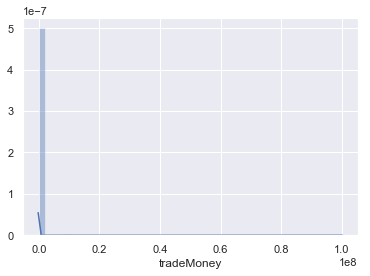

In [7]:
sns.distplot(train[target], bins=50)

In [8]:

train[target].describe() # 最大值1亿应该属于异常

count    4.144000e+04
mean     8.837074e+03
std      5.514287e+05
min      0.000000e+00
25%      2.800000e+03
50%      4.000000e+03
75%      5.500000e+03
max      1.000000e+08
Name: tradeMoney, dtype: float64

(38670, 51)


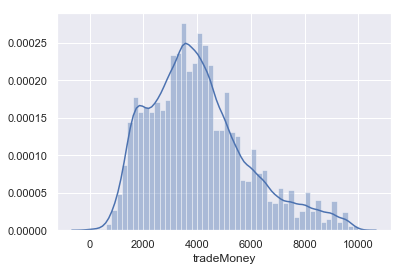

(2406, 51)


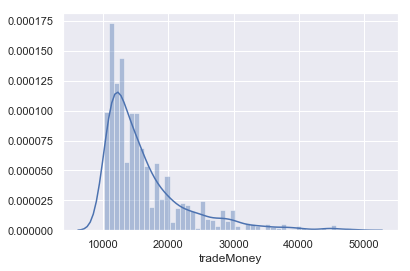

(38, 51)


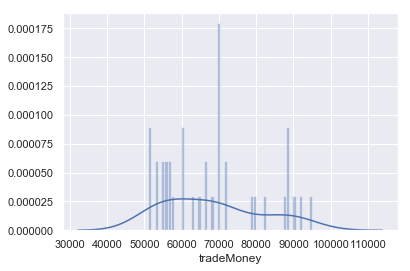

(19, 51)


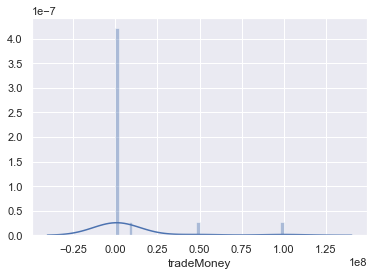

In [9]:
# 大致划了四个区间
train_10 = train[train[target]>100000]
train_5 =  train[train[target]>50000][train[target]<100000]
train_1 =  train[train[target]>10000][train[target]<50000]
train_0 =  train[train[target]<10000]
train_splits = [train_0,train_1,train_5,train_10]
for i in train_splits:
    print(i.shape)
    sns.distplot(i[target], bins=50)
    plt.show()

# 数据清洗

In [10]:
# 把月租金大于5w的样本去除
train = train[train[target]<50000]
data = data[data[target]<50000]

# 缺失值

In [11]:
#缺失值
data_missing= data.isnull().sum().sort_values(ascending=False)
data_missing


uv                    20
pv                    20
tradeMoney             0
plate                  0
gymNum                 0
drugStoreNum           0
hospitalNum            0
privateSchoolNum       0
schoolNum              0
interSchoolNum         0
busStationNum          0
subwayStationNum       0
saleSecHouseNum        0
buildYear              0
region                 0
shopNum                0
city                   0
communityName          0
houseDecoration        0
houseToward            0
totalFloor             0
houseFloor             0
houseType              0
rentType               0
area                   0
bankNum                0
mallNum                0
parkNum                0
tradeTime              0
lookNum                0
residentPopulation     0
newWorkers             0
totalWorkers           0
landMeanPrice          0
landTotalPrice         0
tradeLandArea          0
tradeLandNum           0
supplyLandArea         0
supplyLandNum          0
supplyNewNum           0


In [11]:
#使用均值对缺失值进行填充
mean = data[['pv','uv']].mean()

data = data.fillna(value=mean)


In [12]:
# 查看是否还有缺失值
missing_values_count = data.isnull().sum()
print(missing_values_count)

ID                    0
area                  0
rentType              0
houseType             0
houseFloor            0
totalFloor            0
houseToward           0
houseDecoration       0
communityName         0
city                  0
region                0
plate                 0
buildYear             0
saleSecHouseNum       0
subwayStationNum      0
busStationNum         0
interSchoolNum        0
schoolNum             0
privateSchoolNum      0
hospitalNum           0
drugStoreNum          0
gymNum                0
bankNum               0
shopNum               0
parkNum               0
mallNum               0
superMarketNum        0
totalTradeMoney       0
totalTradeArea        0
tradeMeanPrice        0
tradeSecNum           0
totalNewTradeMoney    0
totalNewTradeArea     0
tradeNewMeanPrice     0
tradeNewNum           0
remainNewNum          0
supplyNewNum          0
supplyLandNum         0
supplyLandArea        0
tradeLandNum          0
tradeLandArea         0
landTotalPrice  

## 上面只是对数值的确实值进行了填充

## 下面对object类型进行处理


In [13]:
"""rentType"""
data['rentType'].value_counts()#未知方式占绝大比例，看是否与target有很强的相关性

未知方式    32888
整租       5722
合租       5224
--          5
Name: rentType, dtype: int64

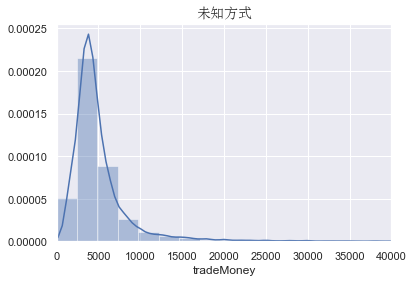

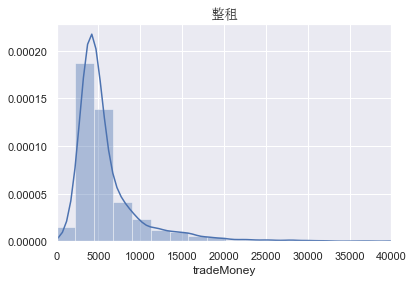

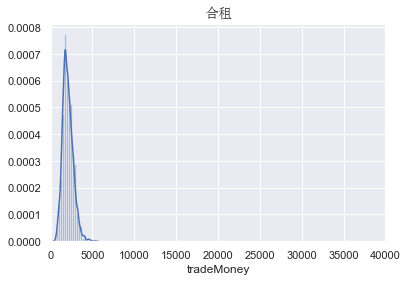

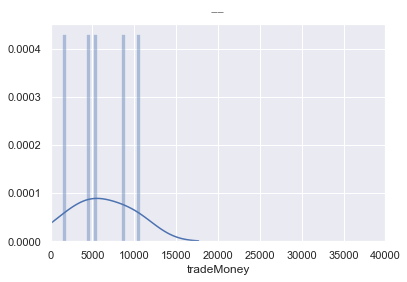

In [14]:
from matplotlib.font_manager import FontProperties
%matplotlib inline
font = FontProperties(fname="c:/windows/fonts/simsun.ttc", size=14) 
for i in train['rentType'].unique():
    sns.distplot(train[train['rentType']==i][target], bins=20)
    plt.xlim(0,40000)
    plt.title(i,fontproperties=font)
    plt.show()

In [15]:
# 由于未知方式占的比例相当大，考虑将其当成一种方式
print(train[train['rentType'] == '--'] .shape)
print(test[test['rentType'] == '--'] .shape)
print(train[train['rentType'] == '未知方式'] .shape)
print(test[test['rentType'] == '未知方式'] .shape)


(5, 51)
(0, 51)
(30703, 51)
(2185, 51)


In [18]:
data['rentType'][data['rentType']=='--']='未知方式'
data['rentType'].value_counts()

未知方式    32893
整租       5722
合租       5224
Name: rentType, dtype: int64

In [18]:
data['houseFloor'].value_counts()

中    16376
高    14889
低    12574
Name: houseFloor, dtype: int64

In [19]:
print(train['houseToward'].value_counts())
print('-------')
print(test['houseToward'].value_counts())


南       34327
南北       2251
北        2041
暂无数据      955
东南        655
东         550
西         262
西南        248
西北         57
东西         24
Name: houseToward, dtype: int64
-------
暂无数据    1173
南        666
南北       530
西南        73
西北        12
西         11
东南         3
东          1
Name: houseToward, dtype: int64


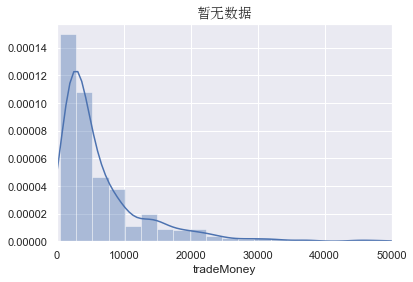

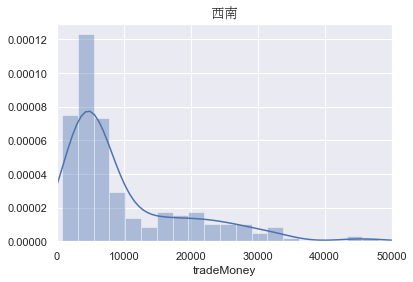

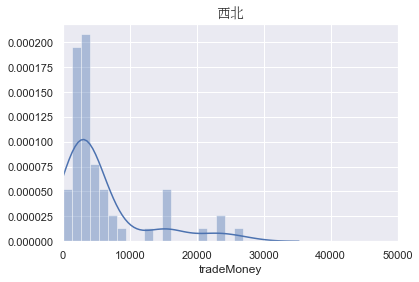

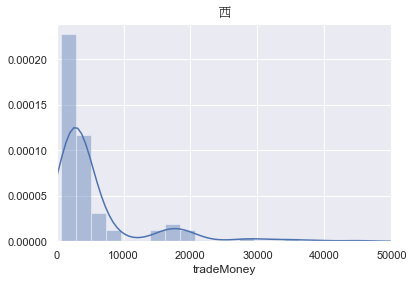

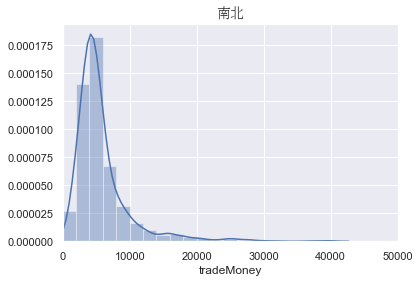

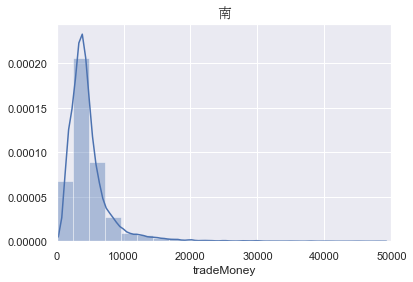

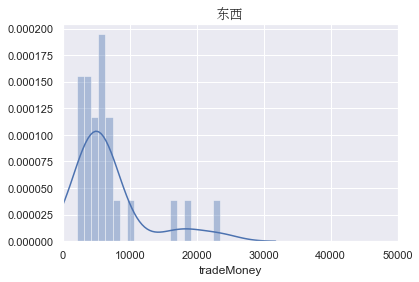

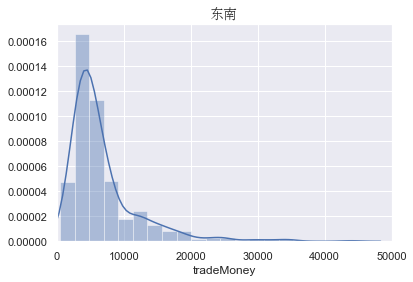

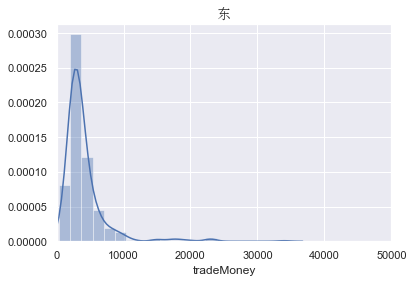

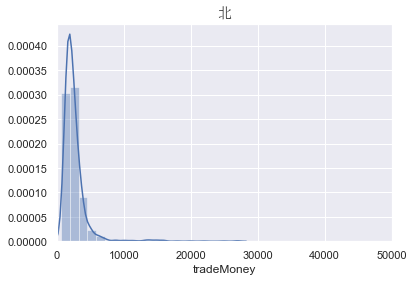

In [20]:
for i in train['houseToward'].unique():
    sns.distplot(train[train['houseToward']==i][target], bins=20)
    plt.xlim(0,50000)
    plt.title(i,fontproperties=font)
    plt.show()

In [21]:
#测试集中的'暂无数据占了近50%'，在训练集上南占了绝大比例，考虑尝试把‘暂无数据’以‘南’替换
data['houseToward'][data['houseToward']=='暂无数据'] = '南'

In [22]:
# print(data['houseToward'].value_counts())



In [22]:
data['houseDecoration'].value_counts()

其他    30972
精装    11269
简装     1271
毛坯      327
Name: houseDecoration, dtype: int64

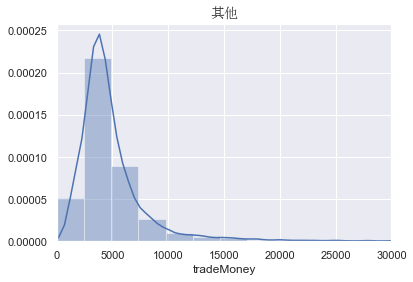

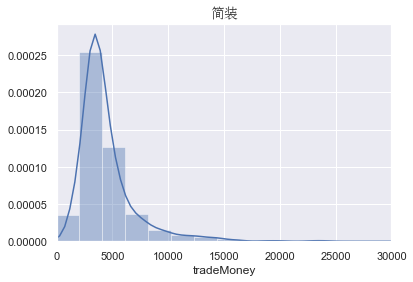

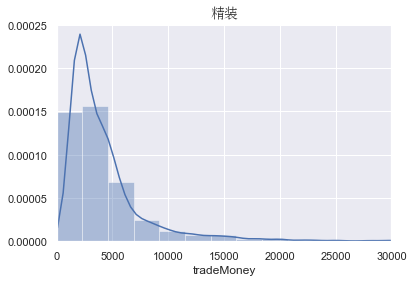

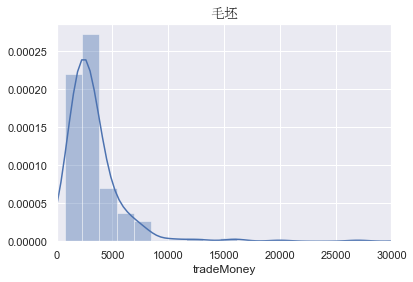

In [24]:
for i in train['houseDecoration'].unique():
    sns.distplot(train[train['houseDecoration']==i][target], bins=20)
    plt.xlim(0,30000)
    plt.title(i,fontproperties=font)
    plt.show()

In [25]:
#有上面分布图可以看到其他装修方式占的比重也很大，将其当成一种新的特征


(2804, 51)
(128, 51)


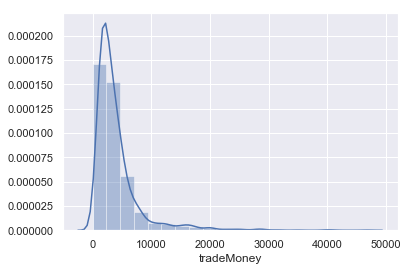

In [23]:
print(train[train['buildYear'] == '暂无信息'] .shape)
print(test[test['buildYear'] == '暂无信息'] .shape)
sns.distplot(train[train['buildYear'] == '暂无信息'][target], bins=20)

In [24]:
# 看分布，决定用中位数填上
median_year = data[data['buildYear'] != '暂无信息']['buildYear'].median()
print(median_year)
data['buildYear'][data['buildYear'] == '暂无信息'] = median_year
data['buildYear'] = data['buildYear'].astype(int)


2002.0


In [30]:
#不同取值个数，可以区分离散特征还是连续特征
nuniq = pd.DataFrame()
nuniq['feature'] = columns
nuniq['num'] = data[columns].nunique().values
print(nuniq)

               feature    num
0                   ID  43839
1                 area  10544
2            houseType    102
3           houseFloor      3
4           totalFloor     54
5          houseToward      9
6      houseDecoration      3
7        communityName   4221
8                 city      1
9               region     15
10               plate     66
11           buildYear     79
12     saleSecHouseNum     28
13    subwayStationNum     13
14       busStationNum     59
15      interSchoolNum      7
16           schoolNum     44
17    privateSchoolNum     17
18         hospitalNum     11
19        drugStoreNum     42
20              gymNum     39
21             bankNum     45
22             shopNum     56
23             parkNum     18
24             mallNum     17
25      superMarketNum     49
26     totalTradeMoney    706
27      totalTradeArea    707
28      tradeMeanPrice    707
29         tradeSecNum    334
30  totalNewTradeMoney    561
31   totalNewTradeArea    535
32   trade

In [25]:
#结合nunique值，对字符类型的特征编码
data['room'] = data['houseType'].apply(lambda x : x.split('室')[0][-1]).astype(int)
data['living'] = data['houseType'].apply(lambda x : x.split('厅')[0][-1]).astype(int)
data['toilet'] = data['houseType'].apply(lambda x : x.split('卫')[0][-1]).astype(int)
columns.remove('houseType')
columns.extend(['room','living','toilet'])
object_feature.remove('houseType')

In [26]:
data['tradeYear'] = data['tradeTime'].apply(lambda x : x.split('/')[0]).astype(int)
data['tradeMonth'] = data['tradeTime'].apply(lambda x : x.split('/')[1]).astype(int)
data['tradeDate'] = data['tradeTime'].apply(lambda x : x.split('/')[2]).astype(int)
columns.remove('tradeTime')
columns.extend(['tradeYear','tradeMonth','tradeDate'])
object_feature.remove('tradeTime')

In [27]:
from sklearn.preprocessing import LabelEncoder

for i in object_feature:
    lbl = LabelEncoder()
    data[i] = lbl.fit_transform(data[i])

In [28]:
#再次查看nunique值信息
nuniq = pd.DataFrame()
nuniq['feature'] = data.columns.tolist()
nuniq['num'] = data.nunique().values
nuniq

,feature,num
0,ID,43839
1,area,10544
2,rentType,3
3,houseType,102
4,houseFloor,3
5,totalFloor,54
6,houseToward,9
7,houseDecoration,4
8,communityName,4221
9,city,1


In [30]:

# 删除ID，定值列
columns.remove('ID')
columns.remove('city')
columns.remove('tradeYear')
len(columns)

ValueError: list.remove(x): x not in list

In [37]:
#训练集和测试集的特征分布对比,如果有明显差异需重新采样训练集
train = data[data[target] != -1]
test = data[data[target] == -1]

LinAlgError: singular matrix

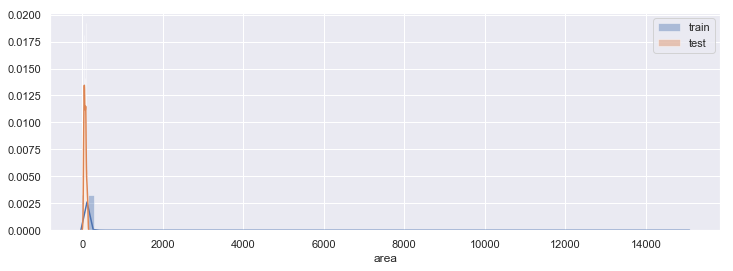

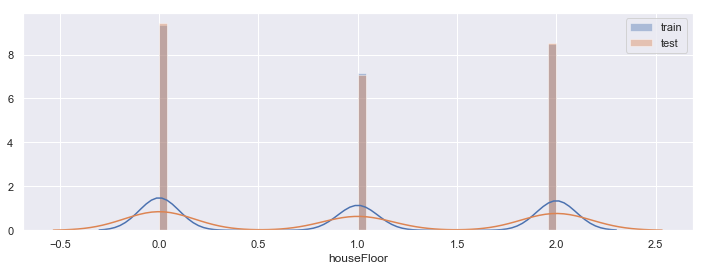

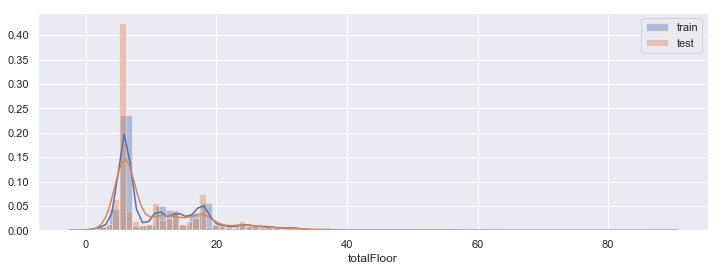

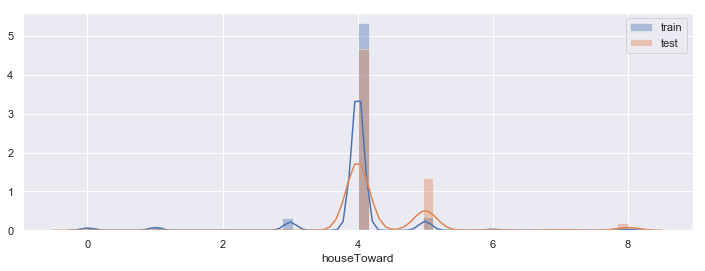

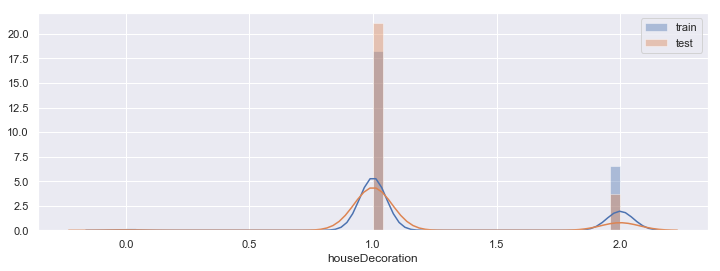

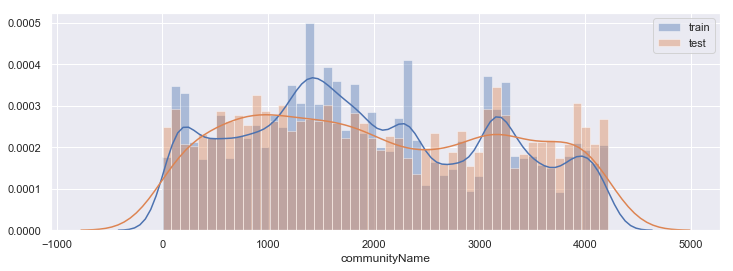

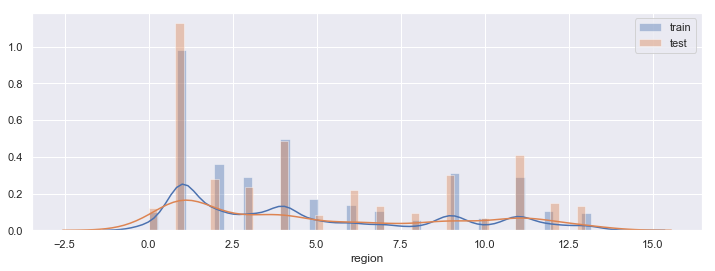

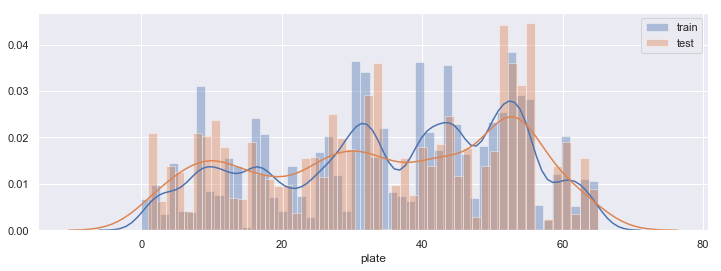

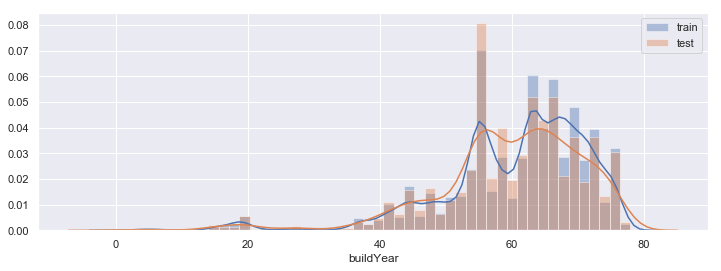

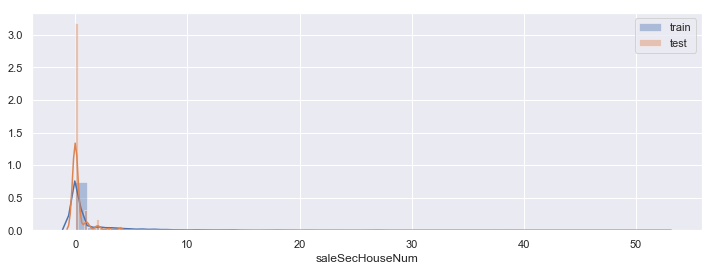

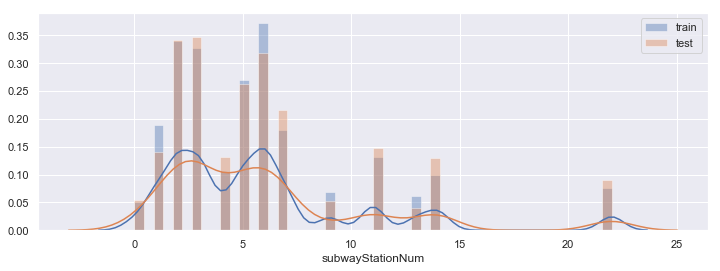

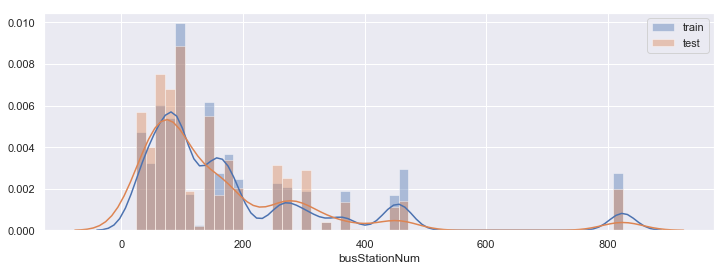

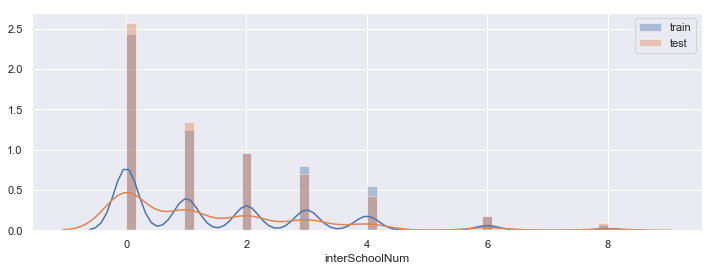

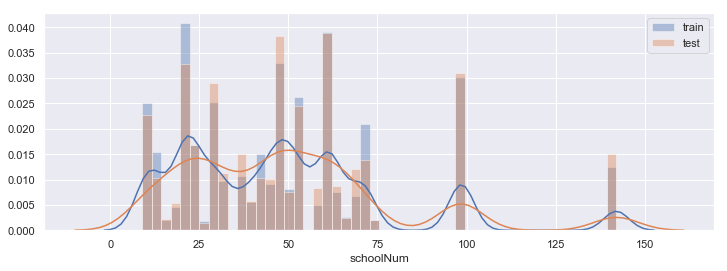

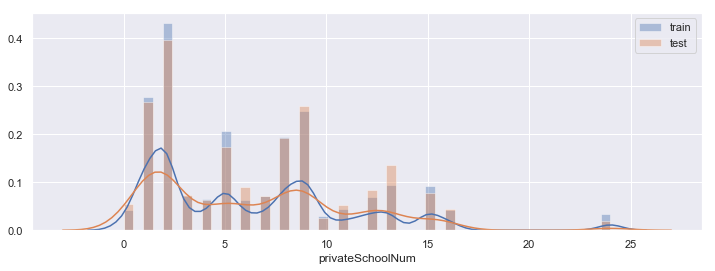

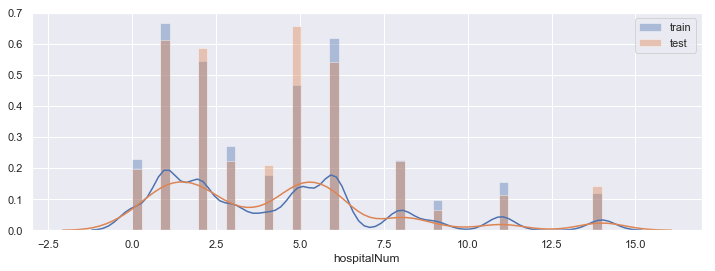

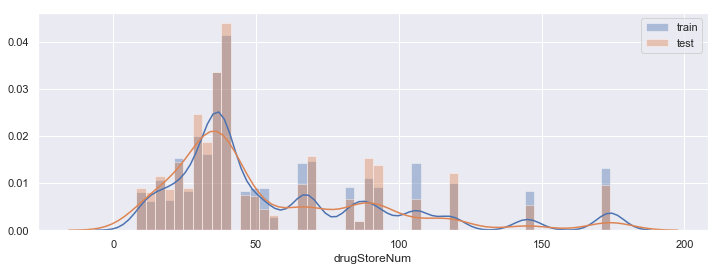

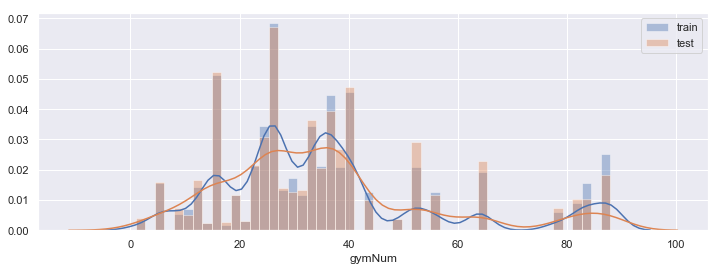

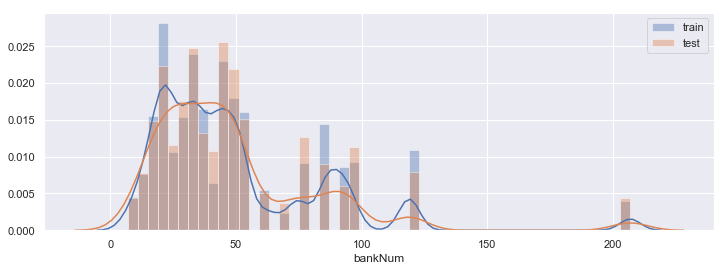

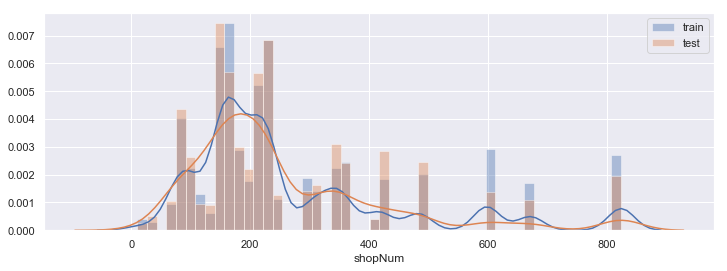

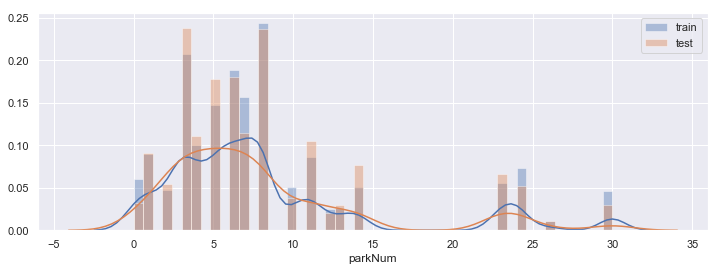

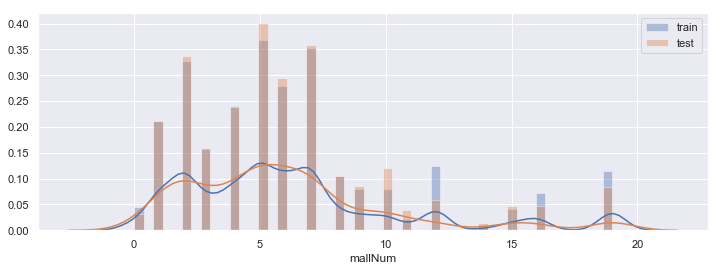

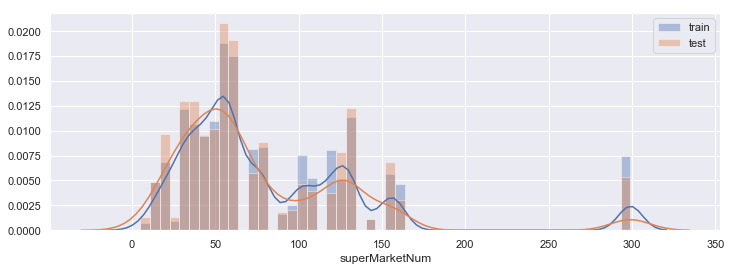

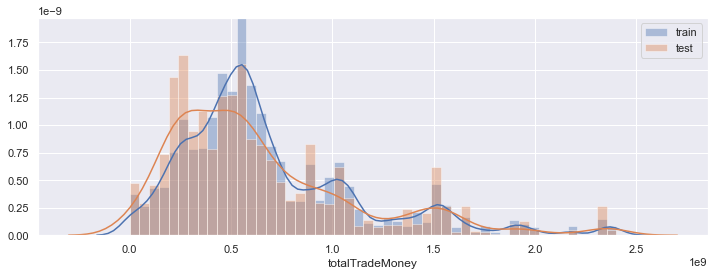

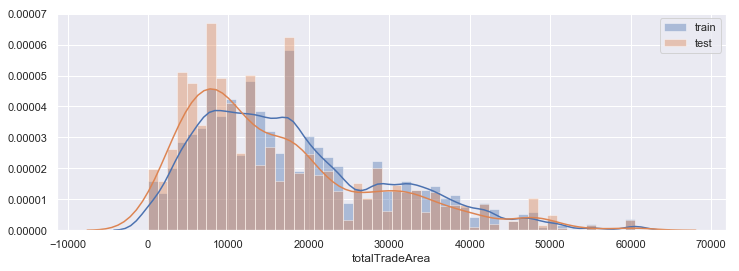

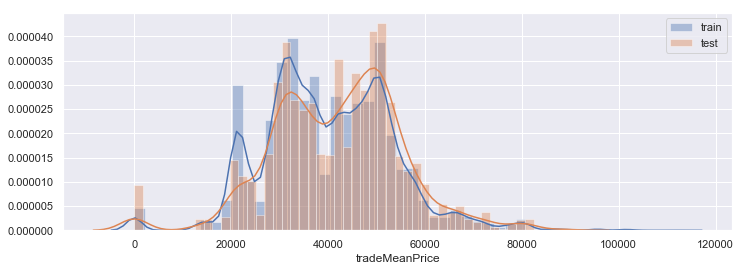

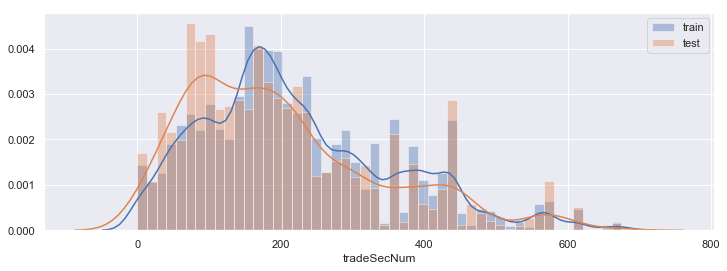

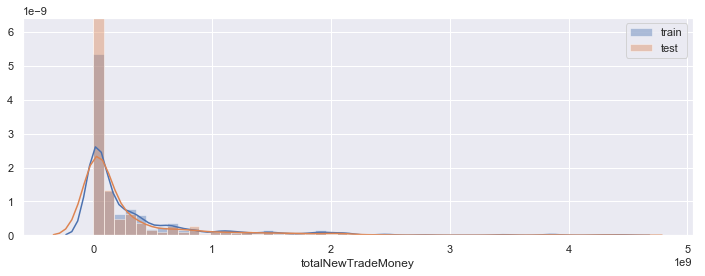

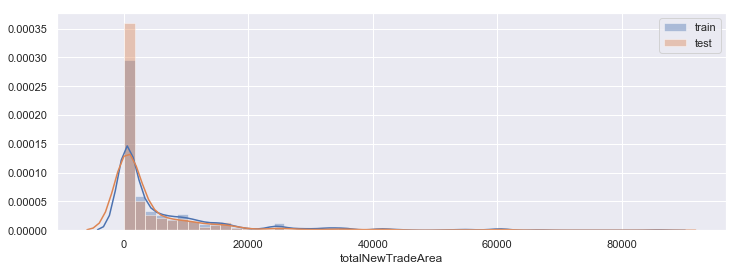

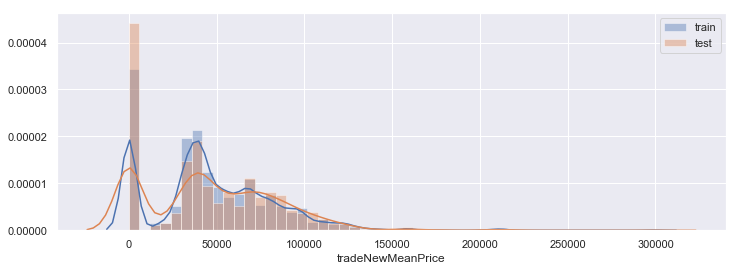

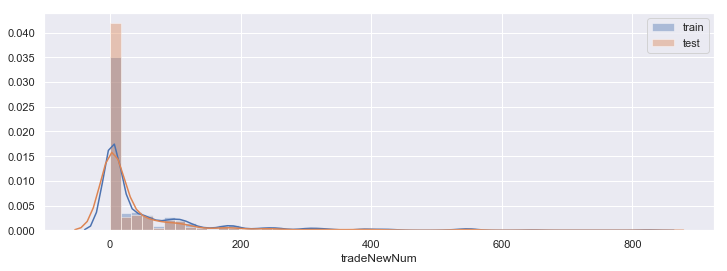

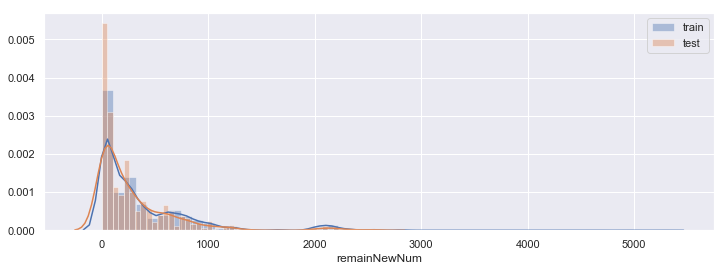

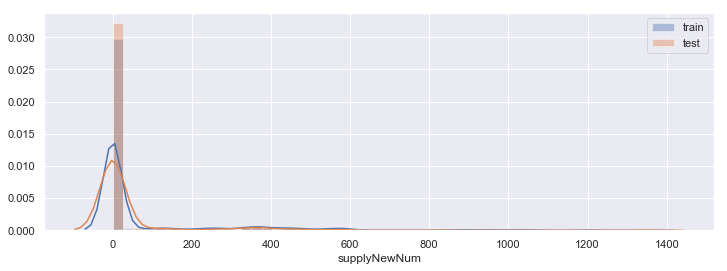

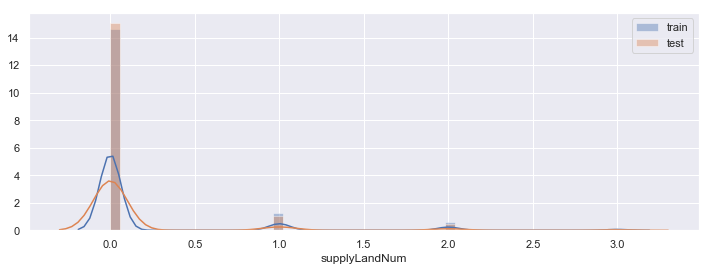

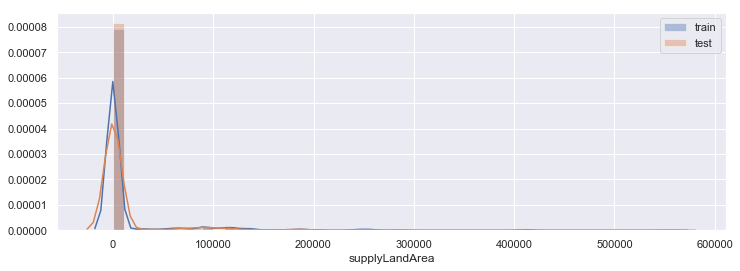

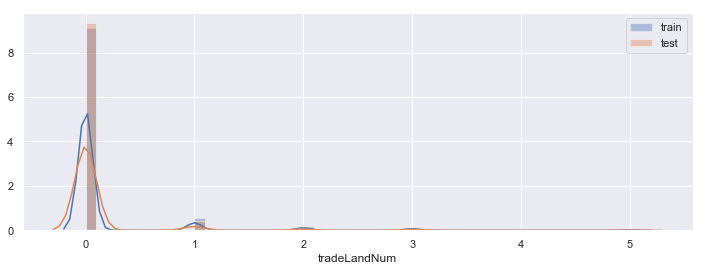

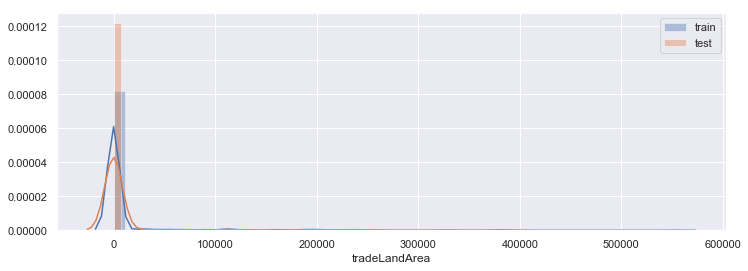

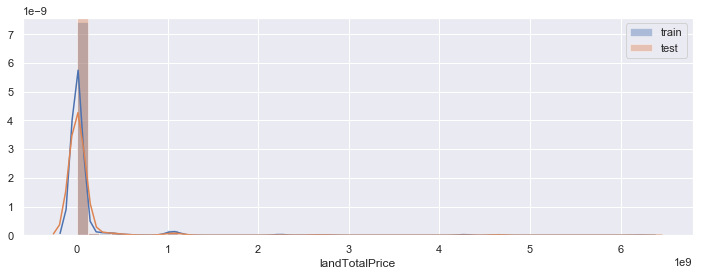

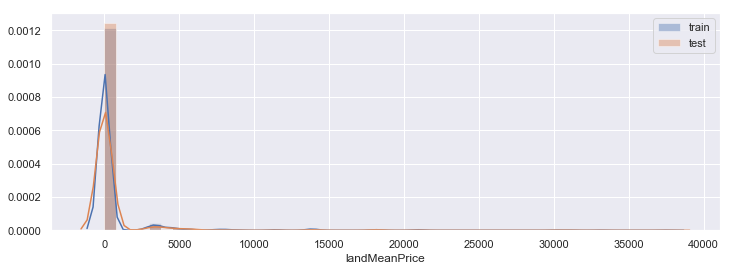

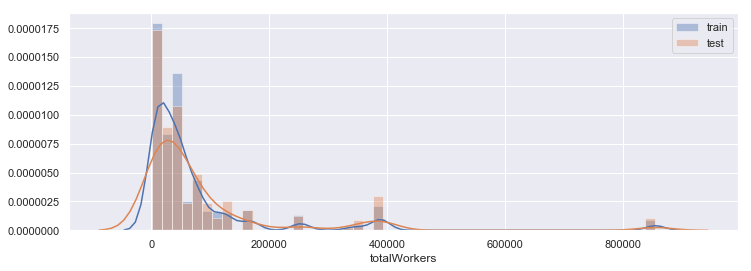

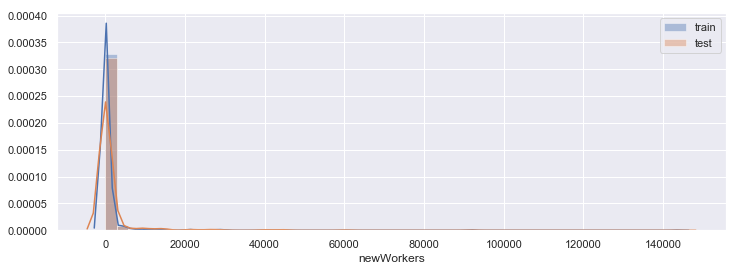

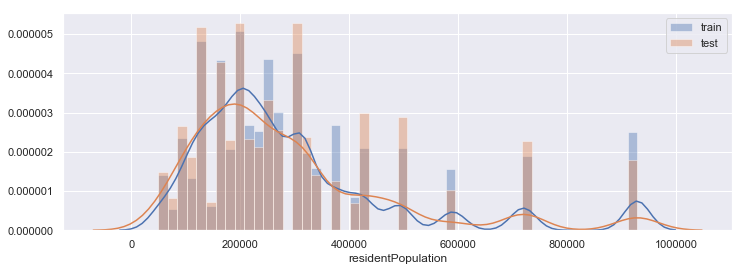

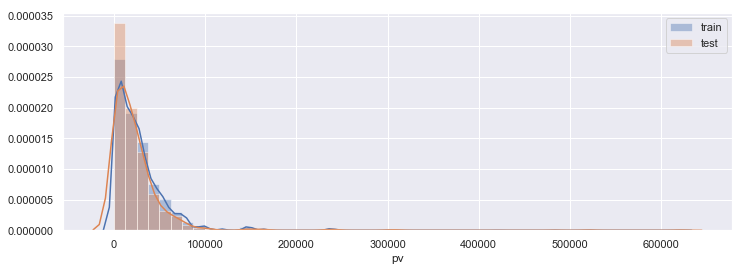

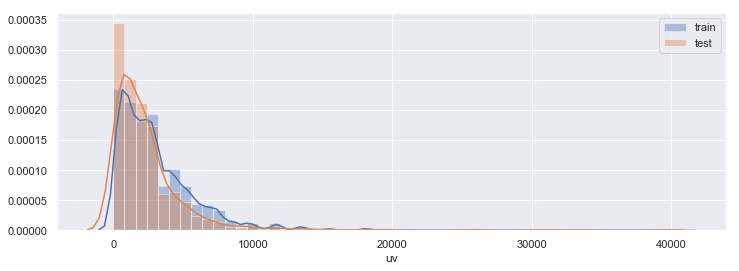

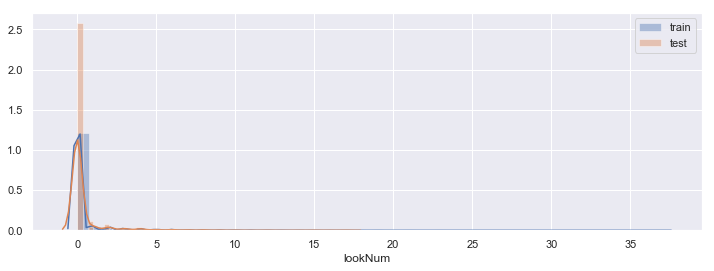

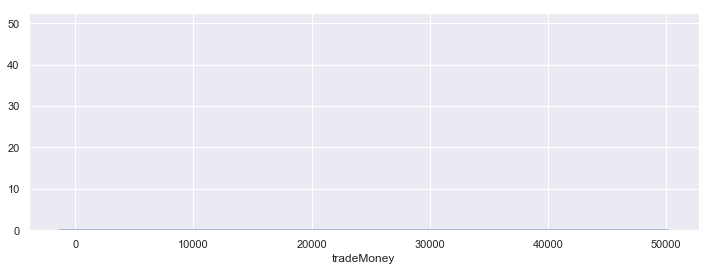

In [40]:
for i,col in enumerate(columns):
    plt.figure(figsize=(12,4))
    sns.distplot(train[col], bins=50)
    sns.distplot(test[col], bins=50) 
    plt.legend(['train','test'])

In [43]:
#  pearson：标准相关系数

#   kendall：Kendall Tau相关系数

#   spearman：Spearman等级相关
relate_cols = columns[:]
#relate_cols.append(target)
train[relate_cols].corr('pearson')[target]

area                  0.356156
houseFloor           -0.016717
totalFloor            0.274534
houseToward           0.084371
houseDecoration      -0.058234
communityName         0.036801
region                0.034275
plate                 0.002300
buildYear             0.109839
saleSecHouseNum      -0.001721
subwayStationNum      0.027174
busStationNum        -0.218048
interSchoolNum        0.067309
schoolNum            -0.043049
privateSchoolNum      0.051340
hospitalNum          -0.063170
drugStoreNum         -0.199238
gymNum                0.087145
bankNum               0.069156
shopNum              -0.208476
parkNum              -0.068582
mallNum              -0.026318
superMarketNum       -0.189437
totalTradeMoney       0.128255
totalTradeArea       -0.054949
tradeMeanPrice        0.308112
tradeSecNum          -0.010390
totalNewTradeMoney    0.038166
totalNewTradeArea    -0.064329
tradeNewMeanPrice     0.252552
tradeNewNum          -0.084565
remainNewNum         -0.113608
supplyNe

In [44]:
train[relate_cols].corr('kendall')[target]

area                  0.443012
houseFloor           -0.017149
totalFloor            0.128452
houseToward           0.137806
houseDecoration      -0.142313
communityName         0.014117
region                0.002891
plate                 0.009232
buildYear             0.020840
saleSecHouseNum       0.071585
subwayStationNum      0.031249
busStationNum        -0.226839
interSchoolNum       -0.026601
schoolNum            -0.044683
privateSchoolNum      0.104634
hospitalNum          -0.033402
drugStoreNum         -0.170652
gymNum                0.063937
bankNum              -0.008523
shopNum              -0.167432
parkNum              -0.026142
mallNum              -0.019795
superMarketNum       -0.186114
totalTradeMoney       0.071349
totalTradeArea       -0.072157
tradeMeanPrice        0.299355
tradeSecNum          -0.055760
totalNewTradeMoney   -0.022120
totalNewTradeArea    -0.075648
tradeNewMeanPrice     0.197663
tradeNewNum          -0.089169
remainNewNum         -0.122426
supplyNe

In [45]:

train[relate_cols].corr('spearman')[target]

area                  0.598674
houseFloor           -0.022285
totalFloor            0.171336
houseToward           0.170854
houseDecoration      -0.174147
communityName         0.020695
region                0.003290
plate                 0.014638
buildYear             0.027472
saleSecHouseNum       0.093521
subwayStationNum      0.044553
busStationNum        -0.332142
interSchoolNum       -0.035369
schoolNum            -0.066613
privateSchoolNum      0.147780
hospitalNum          -0.048874
drugStoreNum         -0.249368
gymNum                0.095655
bankNum              -0.015155
shopNum              -0.245235
parkNum              -0.037672
mallNum              -0.028880
superMarketNum       -0.271225
totalTradeMoney       0.107529
totalTradeArea       -0.106655
tradeMeanPrice        0.430326
tradeSecNum          -0.080408
totalNewTradeMoney   -0.031020
totalNewTradeArea    -0.112169
tradeNewMeanPrice     0.285600
tradeNewNum          -0.131072
remainNewNum         -0.183239
supplyNe

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train[columns],train[target], test_size=0.3, random_state=666)

(28959, 51) (28959,)
(12411, 51) (12411,)


In [48]:
import lightgbm as lgb
from sklearn.metrics import r2_score
lgb_model = lgb.LGBMRegressor(boosting_type="gbdt", objective='regression',metric='mse')
lgb_model.fit(X_train, y_train,
              eval_set=[(X_train, y_train),(X_test, y_test)],
              early_stopping_rounds=10)

[1]	training's l2: 1.14031e+07	valid_1's l2: 1.08712e+07
Training until validation scores don't improve for 10 rounds.
[2]	training's l2: 9.24321e+06	valid_1's l2: 8.80853e+06
[3]	training's l2: 7.49212e+06	valid_1's l2: 7.1349e+06
[4]	training's l2: 6.07312e+06	valid_1's l2: 5.78299e+06
[5]	training's l2: 4.92319e+06	valid_1's l2: 4.68549e+06
[6]	training's l2: 3.99089e+06	valid_1's l2: 3.79604e+06
[7]	training's l2: 3.23556e+06	valid_1's l2: 3.07402e+06
[8]	training's l2: 2.62326e+06	valid_1's l2: 2.49088e+06
[9]	training's l2: 2.12729e+06	valid_1's l2: 2.01924e+06
[10]	training's l2: 1.72515e+06	valid_1's l2: 1.637e+06
[11]	training's l2: 1.39941e+06	valid_1's l2: 1.32725e+06
[12]	training's l2: 1.13527e+06	valid_1's l2: 1.07618e+06
[13]	training's l2: 921210	valid_1's l2: 872567
[14]	training's l2: 747712	valid_1's l2: 707394
[15]	training's l2: 607136	valid_1's l2: 574172
[16]	training's l2: 493122	valid_1's l2: 465717
[17]	training's l2: 400597	valid_1's l2: 378356
[18]	training'

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       metric='mse', min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
       objective='regression', random_state=None, reg_alpha=0.0,
       reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

In [49]:
pred_train = lgb_model.predict(X_train)
train_loss = r2_score(y_train,pred_train)
print("train r2 score:{}".format(train_loss))

pred_test = lgb_model.predict(X_test)
test_loss = r2_score(y_test,pred_test)
print("test r2 score:{}".format(test_loss))

train r2 score:0.9997483134155852
test r2 score:0.9996061099856539


In [50]:
eval_data = pd.read_csv('G:/compete/ai/city_rent_precent/data_set/sub_a_913.csv')
pred_eval = lgb_model.predict(test[columns])
r2_score(eval_data['pre'],pred_eval)

-3.694354941796858